### This notebook goes through an example of Gradient Descent for a simple linear regression
HW Problem credit : Ansaf Salleb-Aouissi COMS 4721 Machine Learning for Data Science
Data: www.cdc.gov/growthcharts
Solution Credit: http://www.johnwittenauer.net/machine-learning-exercises-in-python-part-1/

Load the dataset girls.csv

In [1]:
from array import array
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
girls_train_data = pd.read_csv('/Users/sparthasarathy/Documents/Data Science Workshop/Gradient Descent/girls_train.csv', names=['age','height'])
girls_test_data = pd.read_csv('/Users/sparthasarathy/Documents/Data Science Workshop/Gradient Descent/girls_2_20_test.csv', names=['age','height'])



In [3]:
girls_train_data.head()

,age,height
0,2.00,0.873112
1,2.04,0.877492
2,2.21,0.871571
3,2.38,0.948997
4,2.46,0.895848


In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


/Users/sparthasarathy/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


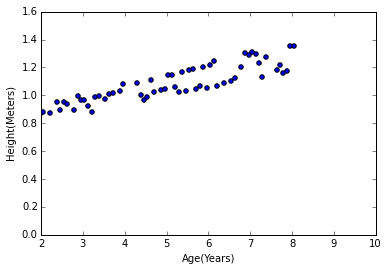

In [5]:
#plotting the datapoints
plt.scatter(girls_train_data['age'],girls_train_data['height'])
plt.xlim(2, 10)
plt.ylim(0, 1.6)
plt.xlabel("Age(Years)")
plt.ylabel("Height(Meters)")
#plt.show()

In [6]:
#learning rate
alpha = 0.05

#error difference, convergence criteria
#epsilon=0.0000001

# Set maximum number of iterations allowed

max_iter = 1500

In [7]:
def computeCost(X, y, theta):  
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

### df.insert - nice way to add a column of constants

In [8]:
girls_train_data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = girls_train_data.shape[1]  
X = girls_train_data.iloc[:,0:cols-1]  
y = girls_train_data.iloc[:,cols-1:cols]

In [9]:
X = np.matrix(X.values)  
y = np.matrix(y.values)  
theta = np.matrix(np.array([0,0])) 

In [10]:
X.shape, theta.shape, y.shape  

((60, 2), (1, 2), (60, 1))

In [11]:
computeCost(X, y, theta)  

0.5946332056258008

In [12]:
def gradientDescent(X, y, theta, alpha, iters):  
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost

In [13]:
g, cost = gradientDescent(X, y, theta, alpha, max_iter)  
g  

matrix([[ 0.75607491,  0.06446429]])

In [14]:
computeCost(X, y, g)

0.001824907666352783

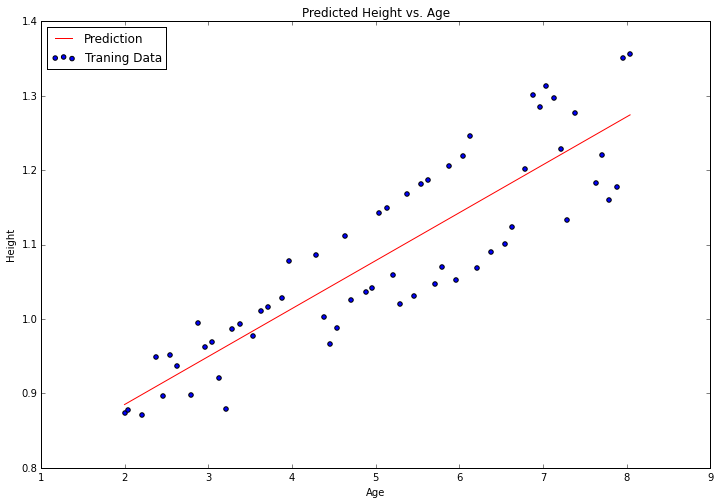

In [18]:
x = np.linspace(girls_train_data.age.min(), girls_train_data.age.max(), 100)  
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(girls_train_data.age, girls_train_data.height, label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('Age')  
ax.set_ylabel('Height')  
ax.set_title('Predicted Height vs. Age')  